In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
data_path = '/content/drive/MyDrive/Churn_Modelling.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Удалим столбцы, которые не являются информативными для модели:

In [6]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Закодируем категориальные признаки посредством One-hot encoding

In [7]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True, dtype='uint8')

In [8]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Построим корреляционную матрицу признаков

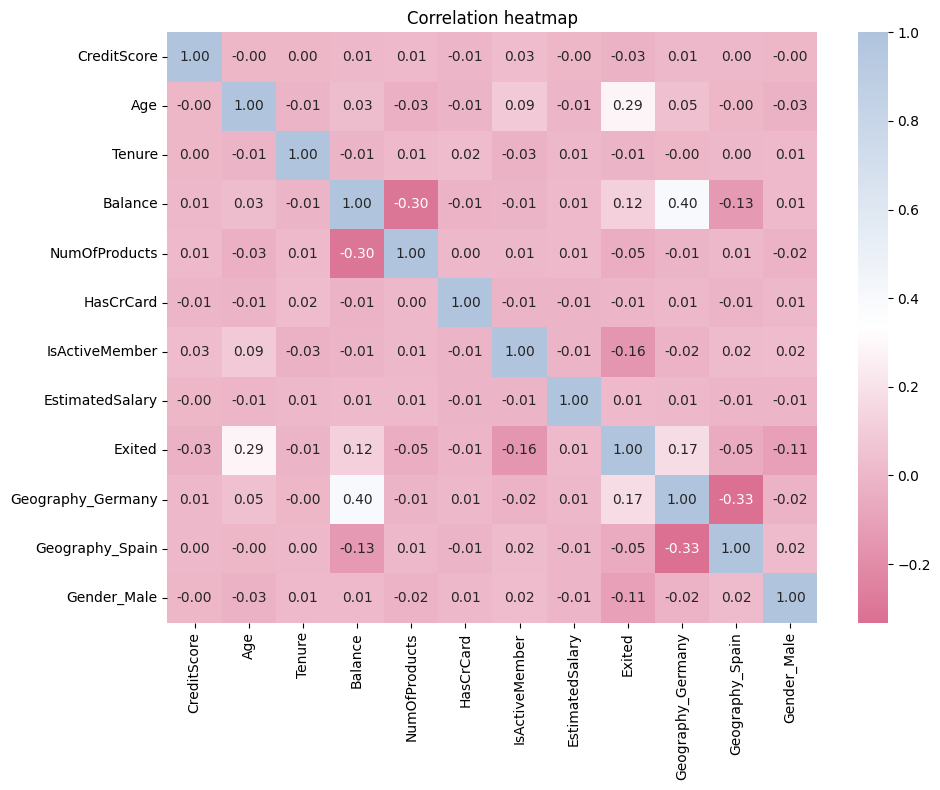

In [37]:
plt.figure(figsize=(10, 8))
# Создаем свою цветовую карту
my_cmap = LinearSegmentedColormap.from_list(
    'my_cmap',
    ['#DB7093', '#FFFFFF', '#B0C4DE']
)
heatmap = sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap=my_cmap)
plt.title('Correlation heatmap')
plt.tight_layout()
plt.show()

In [38]:
numeric_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
exit_colors = {0: '#DB7093', 1: '#B0C4DE'}

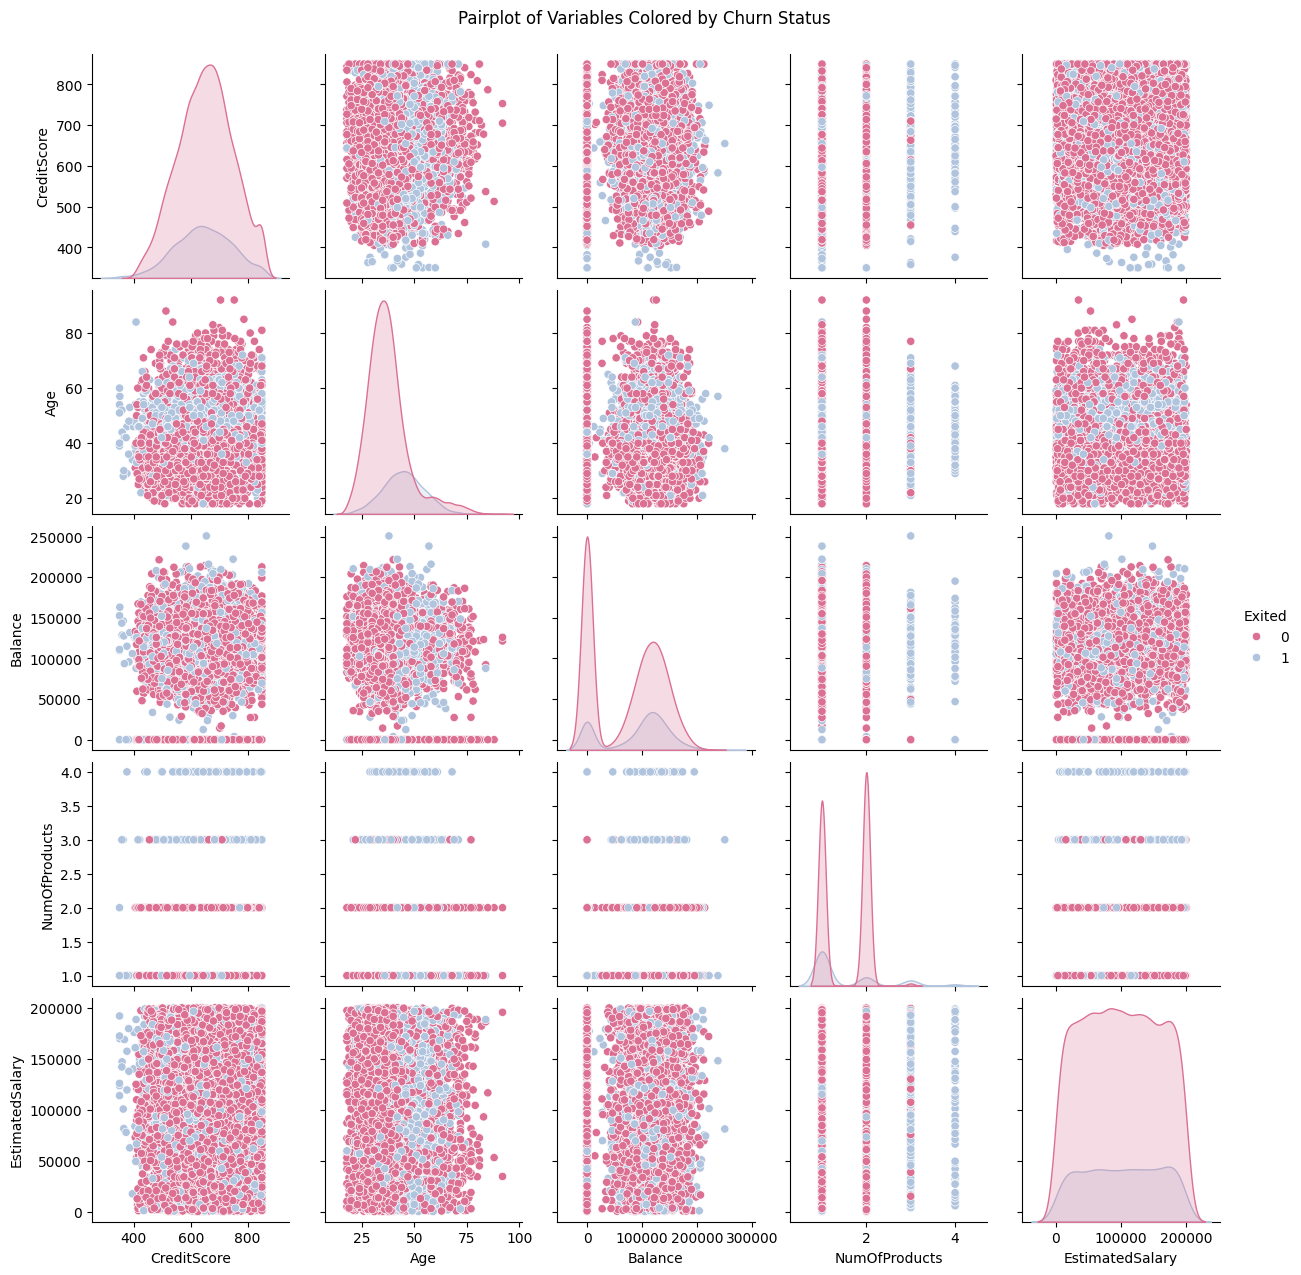

In [39]:
sns.pairplot(data, hue='Exited', palette=exit_colors, vars=numeric_cols)
plt.suptitle('Pairplot of Variables Colored by Churn Status', y=1.02)
plt.show()

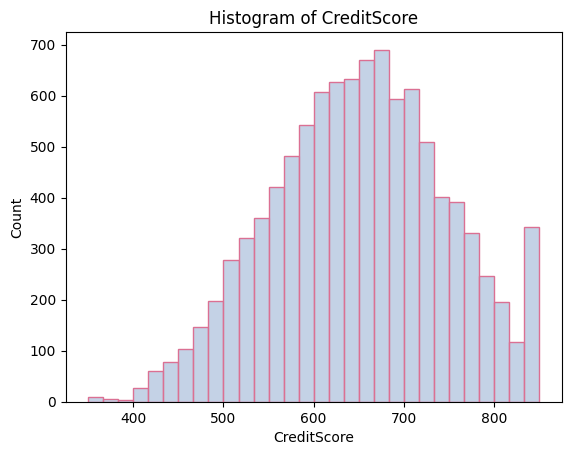

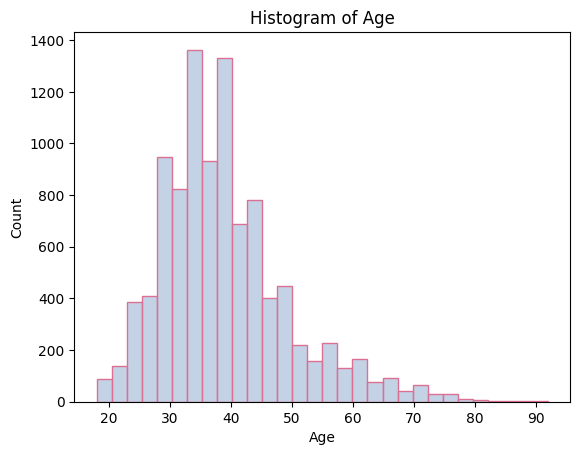

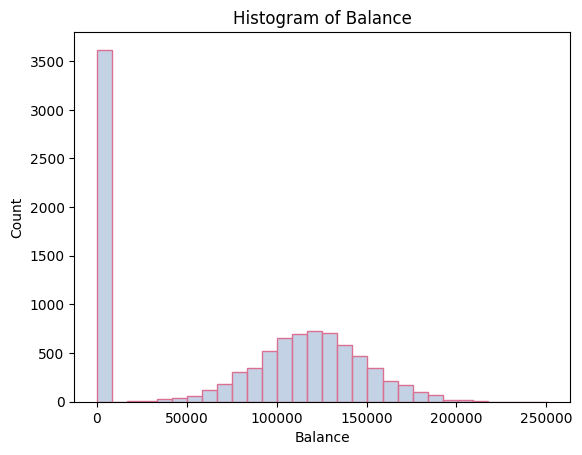

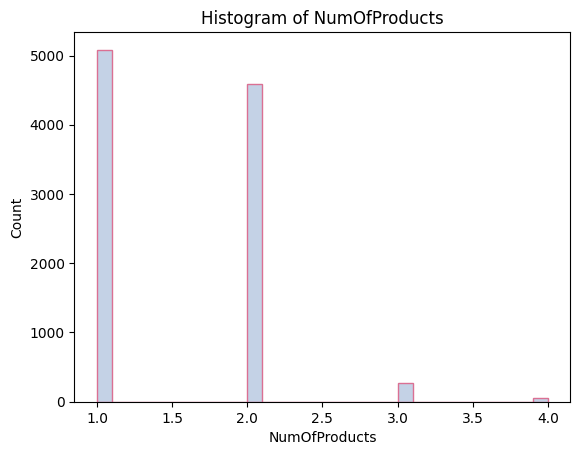

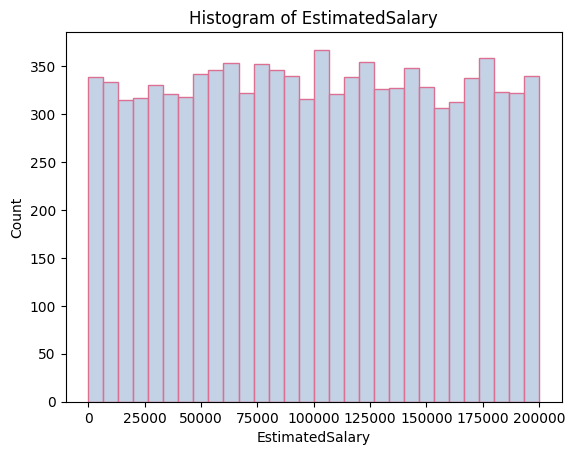

In [45]:
for feature in numeric_cols:
    plt.figure()
    sns.histplot(data[feature], bins=30, edgecolor='#DB7093', color='#B0C4DE')
    plt.title(f'Histogram of {feature}')
    plt.show()

In [46]:
X = data.drop('Exited', axis=1)
Y = data['Exited']

Строим модель логистической регрессии

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=40, test_size=0.2)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [67]:
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=1000))])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(max_iter=1000))])

In [68]:
print(f'Accuracy: {pipe.score(X_test, Y_test)}')

Accuracy: 0.821


In [69]:
Y_pred = pipe.predict(X_test)

Визуализация работы модели

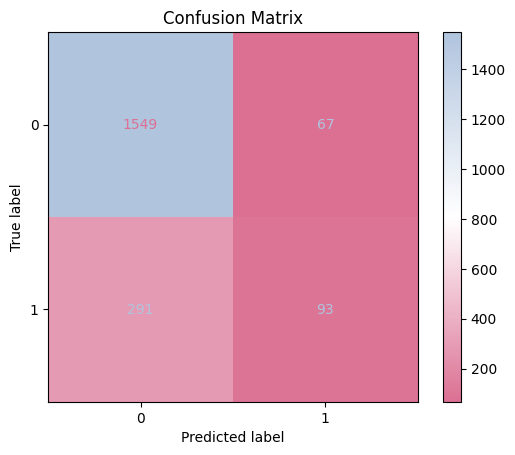

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=my_cmap)
plt.title('Confusion Matrix')
plt.show()

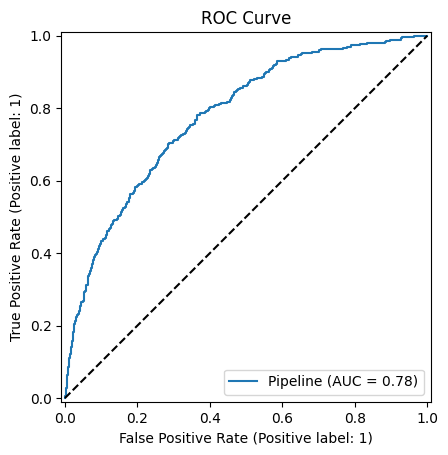

AUC: 0.778


In [71]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

Y_probs = pipe.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(pipe, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  # Линия случайной модели
plt.show()

In [72]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1616
           1       0.58      0.24      0.34       384

    accuracy                           0.82      2000
   macro avg       0.71      0.60      0.62      2000
weighted avg       0.79      0.82      0.79      2000

